In [1]:
import sys
import time
import random
import matplotlib.pyplot as plt

from kyotocabinet import *

In [2]:
def open_db(db,filename):
    if not db.open(filename, DB.OWRITER | DB.OCREATE):
        print("open error: " + str(db.error()), file=sys.stderr)
    else:
        print(filename,'opened')
        

def insert_db(db,key,value):
    if not db.set(key,value):
        print("set error: " + str(db.error()), file=sys.stderr)

        
def retrieve_db(db,key):
    value = db.get_str(key)
    return 1 if value else 0
    
    
def close_db(db):
    path = db.path()
    if not db.close():
        print("close error: " + str(db.error()), file=sys.stderr)
    else:
        print(path ,'closed')

In [3]:
# load data
with open('data/valid_NIS.txt', 'r') as f:
    lines = f.readlines()

data = [line[:-1] for line in lines]
len(data)

100000

In [4]:
# create the databases objects
hash_db  = DB()
btree_db = DB()

open_db(hash_db,'hash.kch')
open_db(btree_db,'btree.kct')

hash.kch opened
btree.kct opened


In [5]:
# store records
for nis in data:
    insert_db(hash_db,nis,0)
    insert_db(btree_db,nis,0)

In [6]:
# testing
existent_nis = data[500]
nonexistent_nis = '0000000000'

print(retrieve_db(hash_db,existent_nis))
print(retrieve_db(btree_db,existent_nis))

print(retrieve_db(hash_db,nonexistent_nis))
print(retrieve_db(btree_db,nonexistent_nis))

1
1
0
0


In [7]:
# evaluating
hash_time = list()
btree_time = list()
step = 1000
batchs = list(range(step,len(data)+step,step))

for batch in batchs:
    random.shuffle(data)
    # hash_db search
    start = time.time()
    for idx in range(batch):
        retrieve_db(hash_db,data[idx])
    hash_time.append(time.time() - start)
    # btree_db search
    start = time.time()
    for idx in range(batch):
        retrieve_db(btree_db,data[idx])
    btree_time.append(time.time() - start)
    print('.', end='')

....................................................................................................

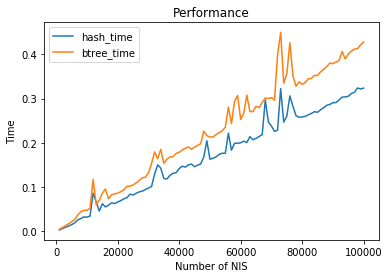

In [8]:
# consolidate
fig, ax = plt.subplots()
ax.plot(batchs, hash_time, label='hash_time')
ax.plot(batchs, btree_time, label='btree_time')
ax.set(xlabel='Number of NIS', ylabel='Time', title='Performance')

plt.legend()
plt.savefig('evaluating.png')
plt.show()

In [9]:
close_db(hash_db)
close_db(btree_db)

hash.kch closed
btree.kct closed
